In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
import umap
import time

# Data Exploration

In [222]:
health_data = pd.read_csv('https://raw.githubusercontent.com/trillmonger/datasci_thinkful/main/csv/Healthcare.csv')

In [224]:
health_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [226]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [228]:
health_raw = health_data.copy()

In [230]:
label_encode = LabelEncoder()
for column in health_raw.select_dtypes(include=['object']).columns:
    health_raw[column] = label_encode.fit_transform(health_raw[column])

health_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 3000 non-null   int64
 1   AGE                    3000 non-null   int64
 2   SMOKING                3000 non-null   int64
 3   YELLOW_FINGERS         3000 non-null   int64
 4   ANXIETY                3000 non-null   int64
 5   PEER_PRESSURE          3000 non-null   int64
 6   CHRONIC_DISEASE        3000 non-null   int64
 7   FATIGUE                3000 non-null   int64
 8   ALLERGY                3000 non-null   int64
 9   WHEEZING               3000 non-null   int64
 10  ALCOHOL_CONSUMING      3000 non-null   int64
 11  COUGHING               3000 non-null   int64
 12  SHORTNESS_OF_BREATH    3000 non-null   int64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64
 14  CHEST_PAIN             3000 non-null   int64
 15  LUNG_CANCER            3000 non-null  

In [232]:
health_raw.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,0,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,0,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,1,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,0,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0


In [234]:
scaler = StandardScaler()

health_stnd = scaler.fit_transform(health_raw) #<- standardized data for EDA and modeling

health_stnd  = pd.DataFrame(health_stnd, columns = health_raw.columns)

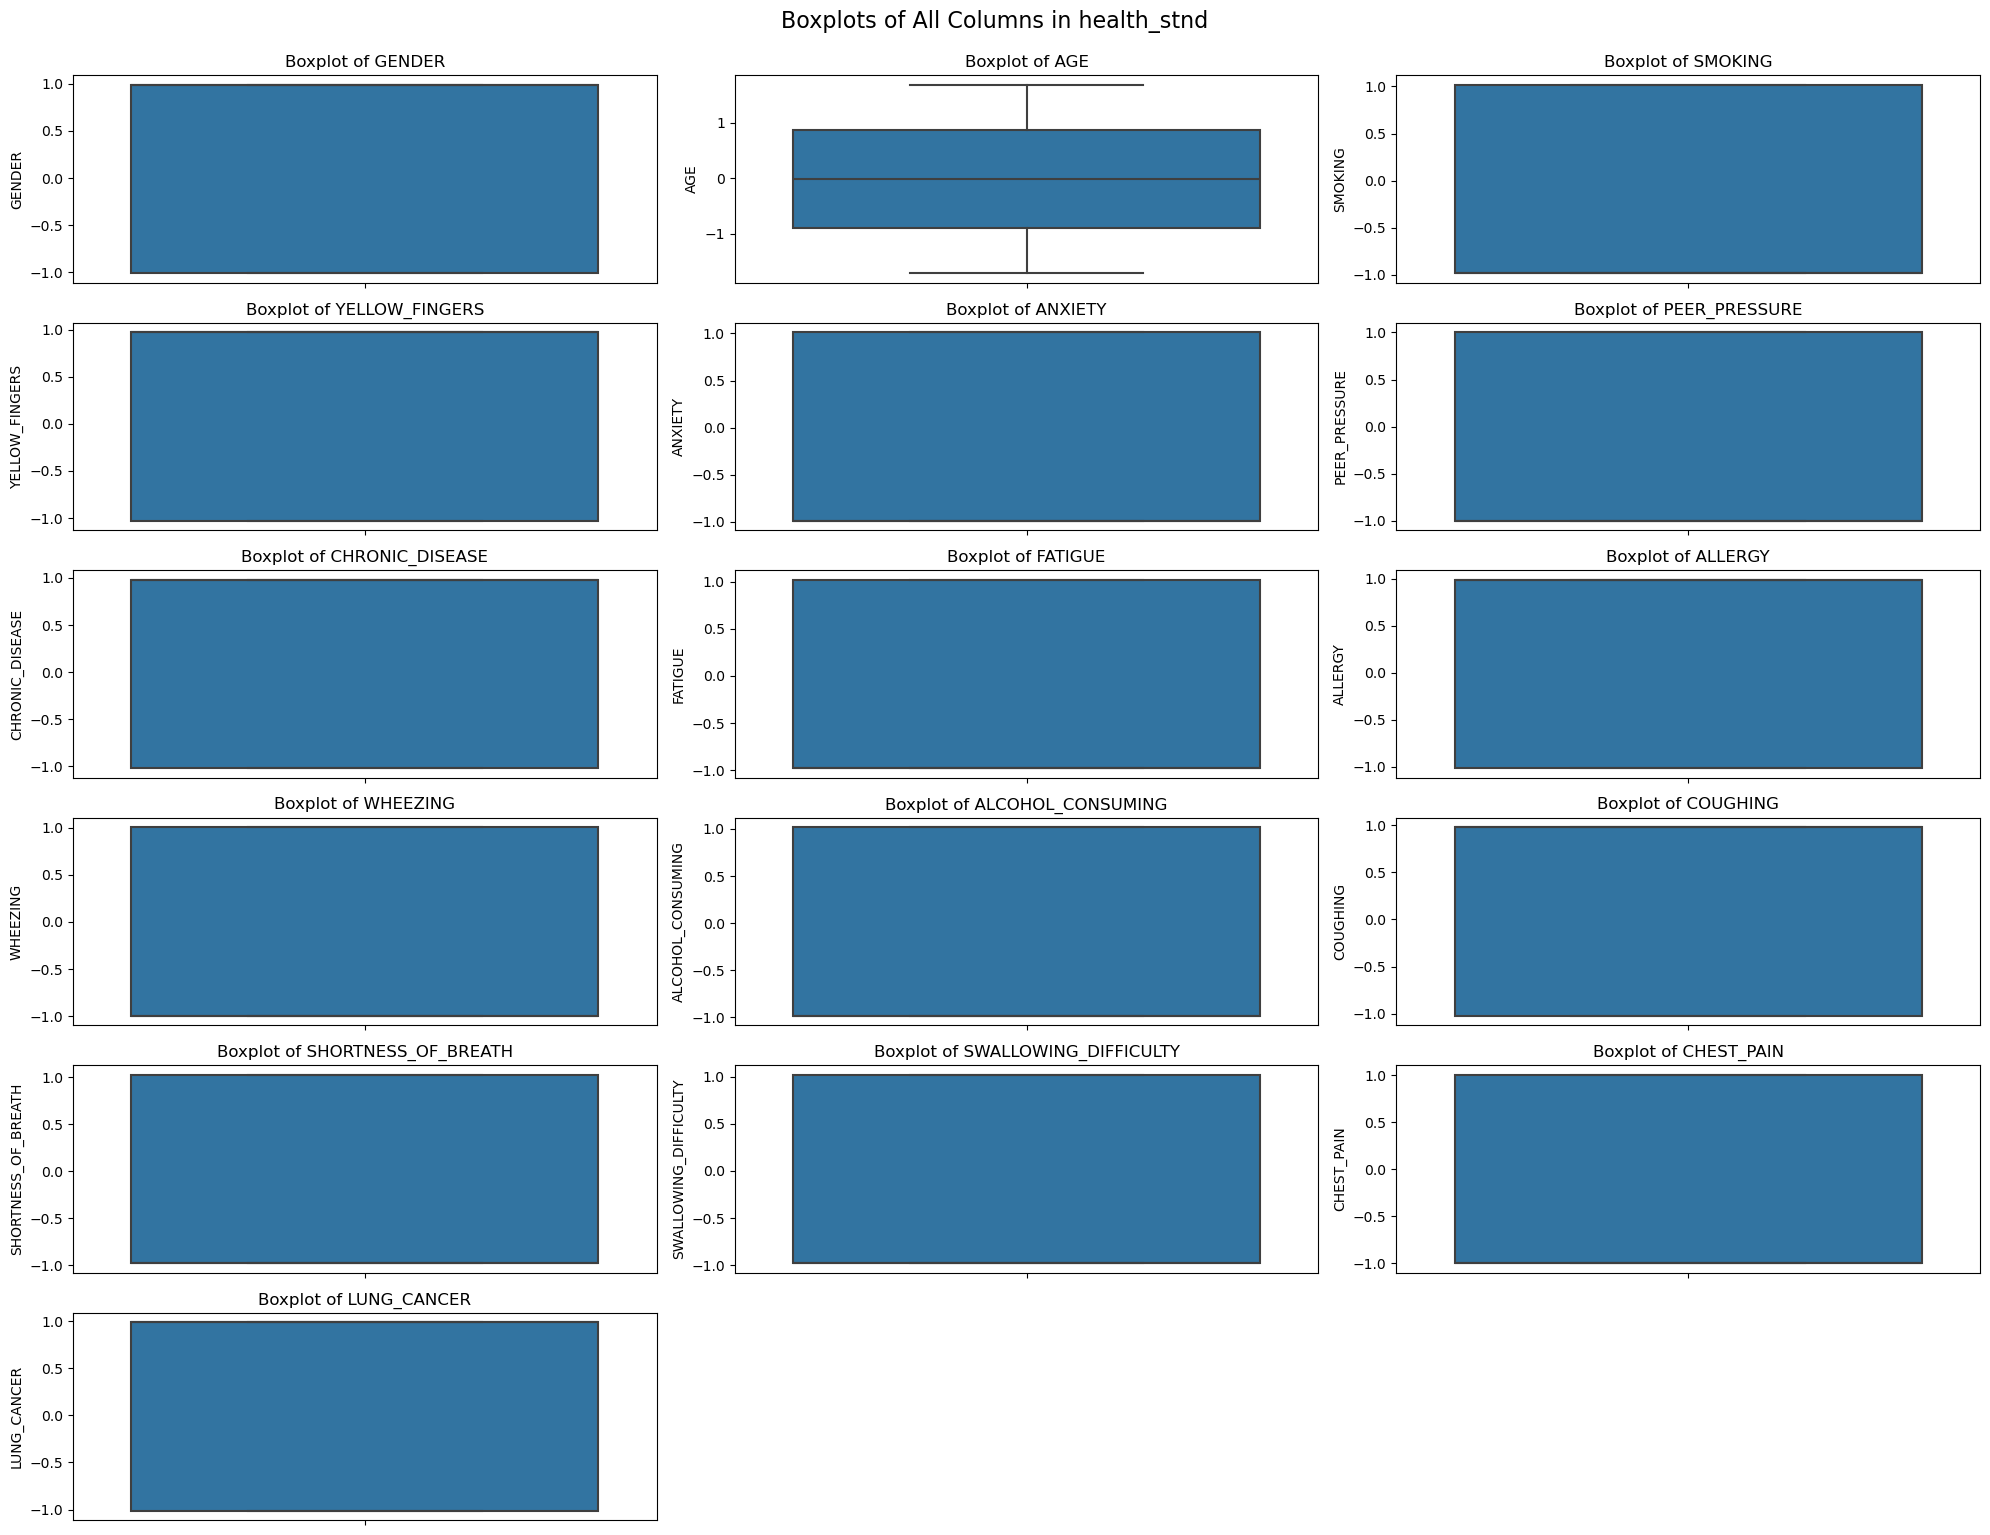

In [244]:
# addressing outliers with boxplot 

plt.figure(figsize=(20, 15))

# Iterate through each column in the DataFrame
for i, col in enumerate(health_stnd.columns):
    plt.subplot(len(health_stnd.columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=health_stnd[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.suptitle('Boxplots of All Columns in health_stnd', fontsize=16, y=1.02)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

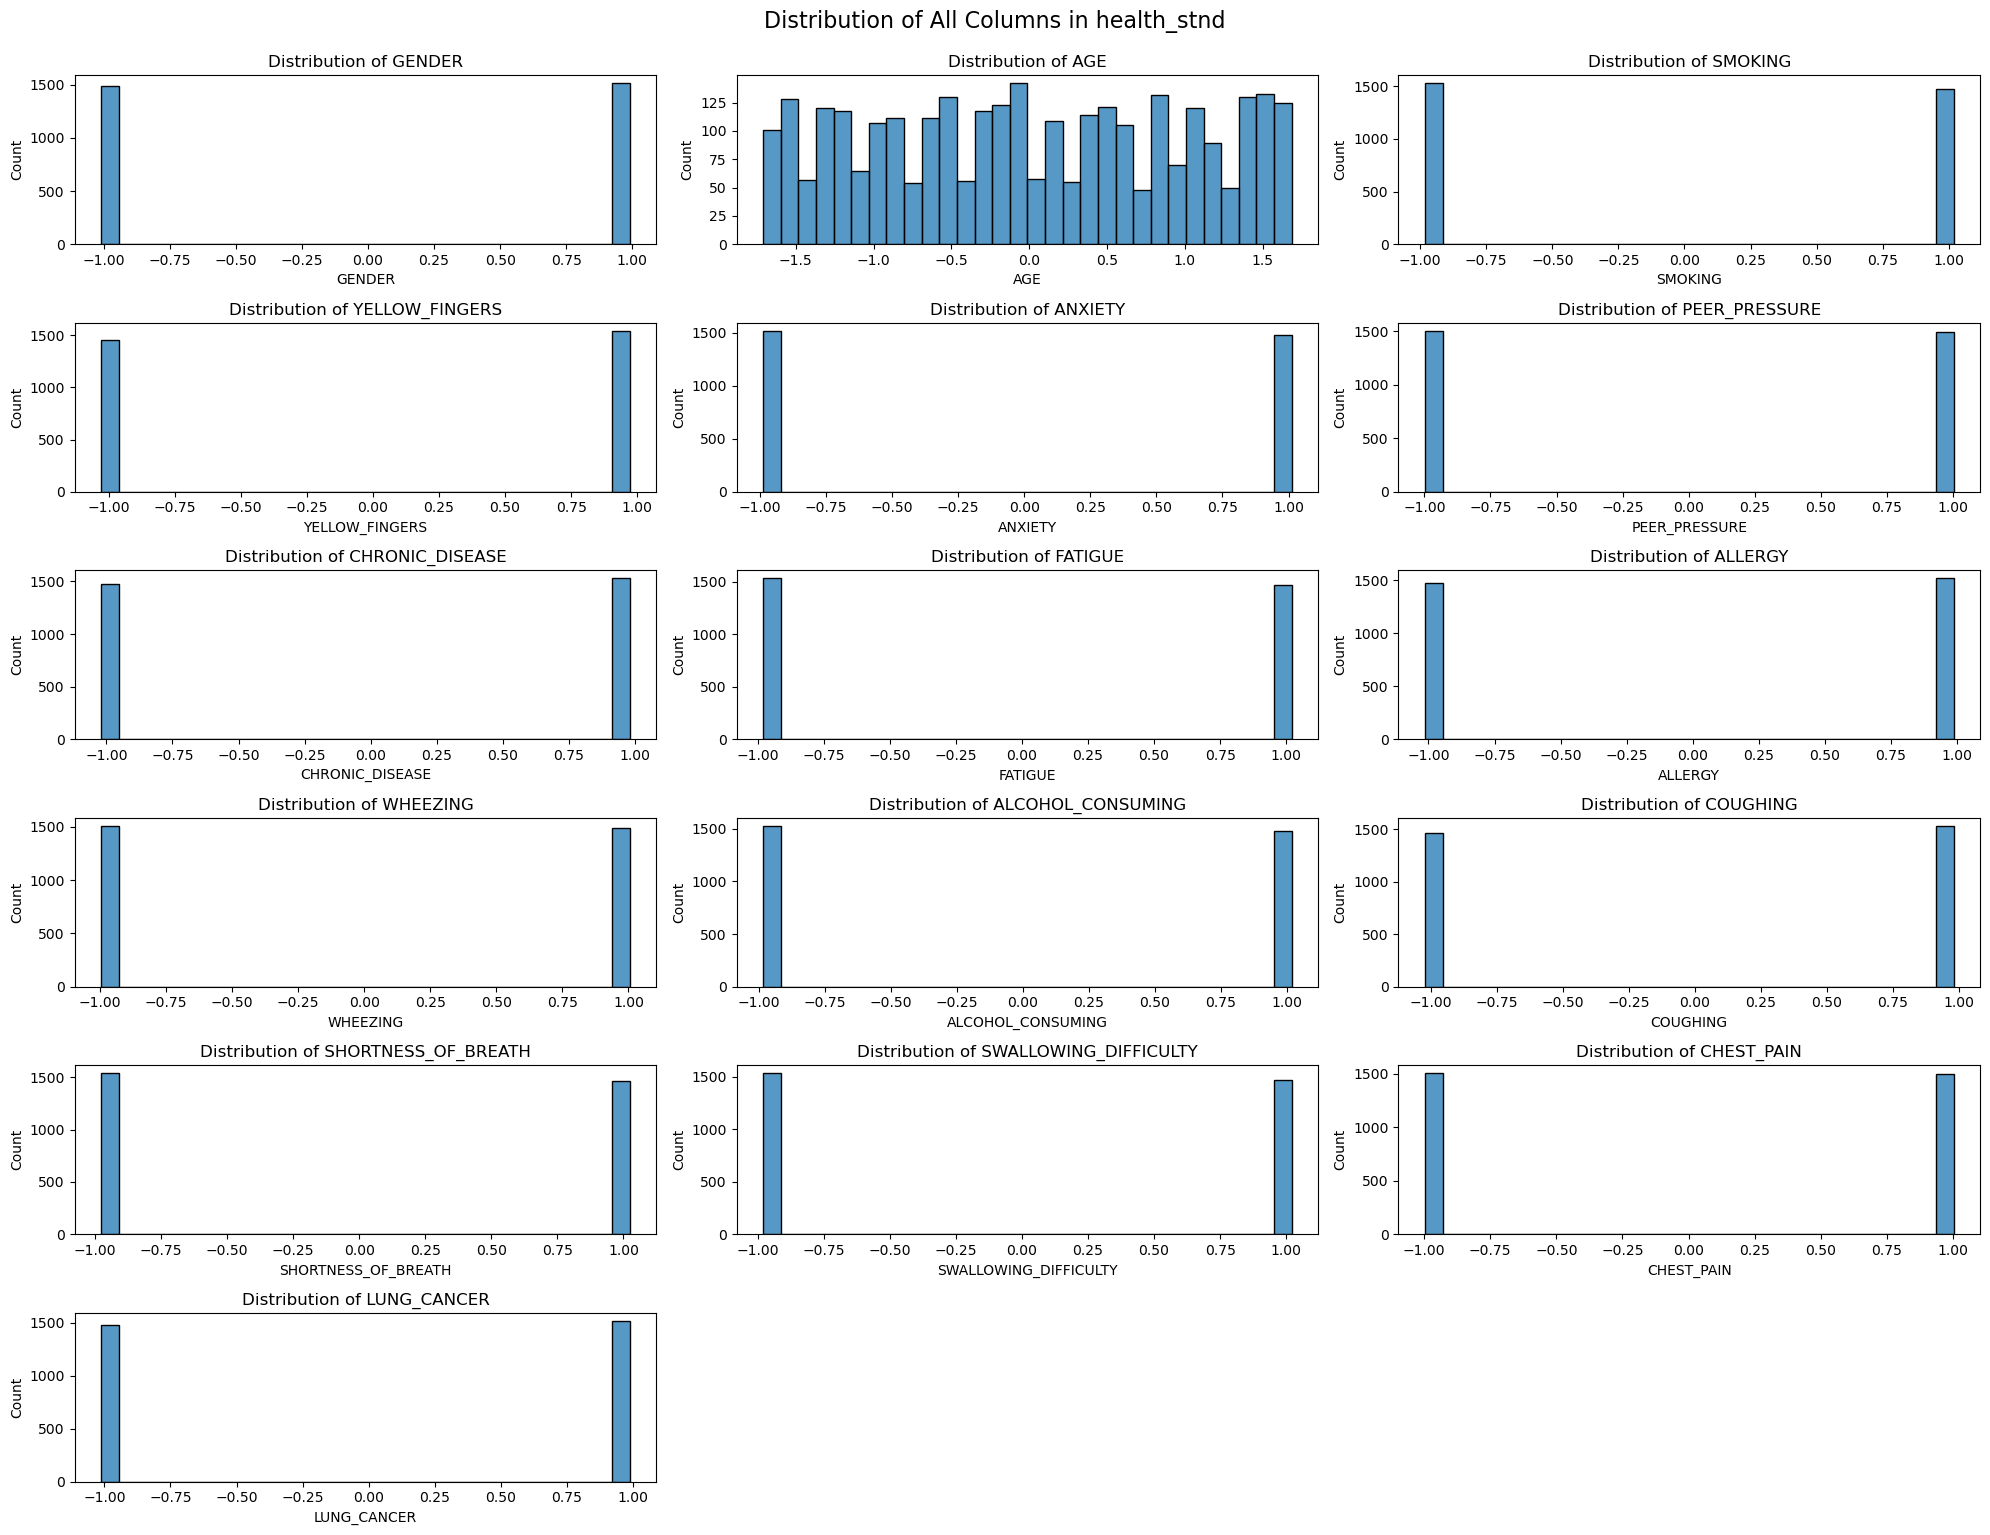

In [242]:
#checking distribution with histograms 
plt.figure(figsize=(20, 15))

# Iterate through each column in the DataFrame
for i, col in enumerate(health_stnd.columns):
    plt.subplot(len(health_stnd.columns) // 3 + 1, 3, i + 1)
    sns.histplot(health_stnd[col], kde=False, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.suptitle('Distribution of All Columns in health_stnd', fontsize=16, y=1.02)
plt.show()

# Model training

## kmeans

In [236]:
for i in range(2,20):
  kmeans = KMeans(n_clusters=i, n_init=15, random_state=43)
  #Kmeans with no Dimension Reduction
  kmeans_normal = kmeans.fit_predict(health_stnd)
  kmeans_silhouette_score = silhouette_score(health_stnd, kmeans_normal, metric='euclidean')
  print(' -> The silhouette score of the Kmean solution without reduction is:{} and the number of clusters is {}'.format(kmeans_silhouette_score, i))


health_stnd_cluster = health_stnd.copy()  
health_stnd_cluster['Kmeans_Labels']= kmeans_result

# 8  -> The silhouette score of the Kmean solution without reduction:0.06598218335876158

 -> The silhouette score of the Kmean solution without reduction is:0.06292027293909823 and the number of clusters is 2
 -> The silhouette score of the Kmean solution without reduction is:0.05073855621738145 and the number of clusters is 3
 -> The silhouette score of the Kmean solution without reduction is:0.06421224983869007 and the number of clusters is 4
 -> The silhouette score of the Kmean solution without reduction is:0.052464076509942704 and the number of clusters is 5
 -> The silhouette score of the Kmean solution without reduction is:0.05196871721527166 and the number of clusters is 6
 -> The silhouette score of the Kmean solution without reduction is:0.05945069102531813 and the number of clusters is 7
 -> The silhouette score of the Kmean solution without reduction is:0.06629127055692563 and the number of clusters is 8
 -> The silhouette score of the Kmean solution without reduction is:0.04901322620248922 and the number of clusters is 9
 -> The silhouette score of the Kmean s

The number of clusters with the best silhouette score is 8

In [136]:
# Apply PCA to the K-means algorithm 
for i in range(2, 10):
    # PCA with dynamic number of components
    pca = PCA(n_components=i)

    # Fitting data to PCA reduction
    pca_health = pca.fit_transform(health_stnd)

    # Generate column names based on the number of components
    columns_pca = [f'PCA{j+1}' for j in range(i)]

    # Create DataFrame with dynamic column names
    df_pca = pd.DataFrame(pca_health, columns=columns_pca)

    # KMeans with PCA Reduction
    kmeans = KMeans(n_clusters=8, n_init=15, random_state=43)
    kmeans_pca = kmeans.fit_predict(df_pca)

    # Calculate silhouette score
    pca_means_silhouette_score = silhouette_score(df_pca, kmeans_pca, metric='euclidean')

    # Print results
    print('The silhouette score of the KMeans solution with PCA is {} with the # of components being {}.'.format(means_silhouette_score, i))

health_stnd_cluster['PCA_Kmeans_Labels']= kmeans_pca


The silhouette score of the KMeans solution with PCA is 0.07848670906642254 with the # of components being 2.
The silhouette score of the KMeans solution with PCA is 0.07848670906642254 with the # of components being 3.
The silhouette score of the KMeans solution with PCA is 0.07848670906642254 with the # of components being 4.
The silhouette score of the KMeans solution with PCA is 0.07848670906642254 with the # of components being 5.
The silhouette score of the KMeans solution with PCA is 0.07848670906642254 with the # of components being 6.
The silhouette score of the KMeans solution with PCA is 0.07848670906642254 with the # of components being 7.
The silhouette score of the KMeans solution with PCA is 0.07848670906642254 with the # of components being 8.
The silhouette score of the KMeans solution with PCA is 0.07848670906642254 with the # of components being 9.


In [137]:
# Applying t-SNE to the K-means algorithm 
for i in range(1, 4):
    # t-SNE with dynamic number of components
    tsne = TSNE(n_components=i, n_iter=300, random_state=42)

    # Fitting data to t-SNE reduction
    tsne_health = tsne.fit_transform(health_stnd)

    # Generate column names based on the number of components
    columns_tsne = [f'TSNE{j+1}' for j in range(i)]

    # Create DataFrame with dynamic column names
    df_tsne = pd.DataFrame(tsne_health, columns=columns_tsne)

    # KMeans with t-SNE Reduction
    kmeans = KMeans(n_clusters=8, n_init=15, random_state=43)
    kmeans_tsne = kmeans.fit_predict(df_tsne)

    # Calculate silhouette score
    tsne_means_silhouette_score = silhouette_score(df_tsne, kmeans_tsne, metric='euclidean')

    # Print results
    print('The silhouette score of the KMeans solution with t-SNE is {} with the # of components being {}.'.format(tsne_means_silhouette_score, i))

health_stnd_cluster['tSNE_Kmeans_Labels'] = kmeans_tsne #adding t-SNE Kmeans labels to the dataset

The silhouette score of the KMeans solution with t-SNE is 0.5367113351821899 with the # of components being 1.
The silhouette score of the KMeans solution with t-SNE is 0.3499753475189209 with the # of components being 2.
The silhouette score of the KMeans solution with t-SNE is 0.24888165295124054 with the # of components being 3.


In [158]:
# Applying UMAP to the K-means algorithm 
#UMAP
for i in range(2,10):
    # UMAP with dynamic number of components
    time_start = time.time()
    umap_health = umap.UMAP(n_neighbors=7, n_components=i, min_dist=.3, metric='correlation').fit_transform(health_stnd)
    

    # Generate column names based on the number of components
    columns_umap = [f'UMAP{j+1}' for j in range(i)]

    # Create DataFrame with dynamic column names
    df_umap = pd.DataFrame(umap_health, columns=columns_umap)

    # KMeans with UMAP Reduction
    kmeans = KMeans(n_clusters=8, n_init=15, random_state=43)
    kmeans_umap = kmeans.fit_predict(df_umap)

    # Calculate silhouette score
    umap_means_silhouette_score = silhouette_score(df_umap, kmeans_umap, metric='euclidean')

    # Print results
    print('The silhouette score of the KMeans solution with UMAP is {} with the # of components being {}.'.format(umap_means_silhouette_score, i))
    
health_stnd_cluster['UMAP_Kmeans_Labels'] = kmeans_umap #adding t-SNE Kmeans labels to the dataset



The silhouette score of the KMeans solution with UMAP is 0.3475956320762634 with the # of components being 2.
The silhouette score of the KMeans solution with UMAP is 0.25889936089515686 with the # of components being 3.
The silhouette score of the KMeans solution with UMAP is 0.2072921097278595 with the # of components being 4.
The silhouette score of the KMeans solution with UMAP is 0.18323078751564026 with the # of components being 5.
The silhouette score of the KMeans solution with UMAP is 0.1649467945098877 with the # of components being 6.
The silhouette score of the KMeans solution with UMAP is 0.15204592049121857 with the # of components being 7.
The silhouette score of the KMeans solution with UMAP is 0.13790716230869293 with the # of components being 8.
The silhouette score of the KMeans solution with UMAP is 0.13807767629623413 with the # of components being 9.


In [160]:
health_stnd_cluster.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Kmeans_Labels,PCA_Kmeans_Labels,tSNE_Kmeans_Labels,UMAP_Kmeans_Labels
0,0.990710,0.667808,-0.982159,-1.028403,-0.988071,1.002002,0.980850,-0.979543,0.986754,1.005348,1.017486,0.978889,1.024295,1.020885,-0.997337,-1.012073,17,3,1,4
1,-1.009377,-0.011480,-0.982159,0.972381,1.012073,-0.998002,-1.019524,1.020885,0.986754,1.005348,-0.982814,-1.021566,-0.976281,1.020885,1.002670,-1.012073,9,0,7,4
2,-1.009377,1.550883,1.018165,0.972381,-0.988071,-0.998002,-1.019524,1.020885,-1.013423,1.005348,-0.982814,-1.021566,1.024295,-0.979543,-0.997337,0.988071,5,1,0,6
3,0.990710,0.328164,1.018165,-1.028403,-0.988071,-0.998002,0.980850,-0.979543,0.986754,-0.994681,-0.982814,0.978889,-0.976281,1.020885,1.002670,0.988071,1,4,4,1
4,-1.009377,1.686741,-0.982159,-1.028403,1.012073,-0.998002,-1.019524,1.020885,-1.013423,1.005348,-0.982814,-1.021566,-0.976281,-0.979543,1.002670,-1.012073,15,0,5,2


<Figure size 1000x2000 with 0 Axes>

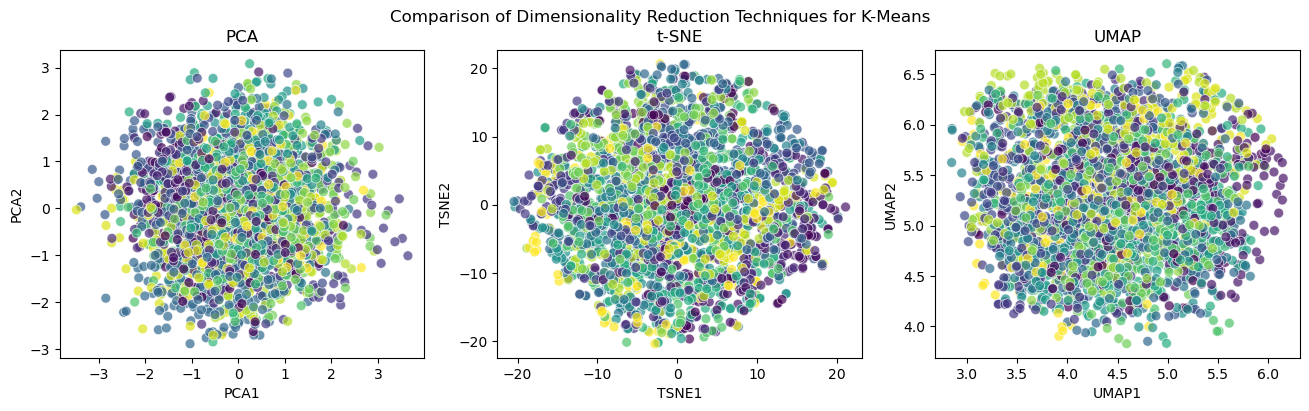

In [196]:
#Visualization of Dimensional Reduction techniques for Kmeans

plt.figure(figsize=(10,20))

# PCA scatterplot
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue=health_stnd_cluster['Kmeans_Labels'], palette='viridis', data=df_pca, legend=False, s=50, alpha=.7)
plt.title('PCA')

# t-SNE scatterplot
plt.subplot(1, 3, 2)
sns.scatterplot(x='TSNE1', y='TSNE2',hue=health_stnd_cluster['Kmeans_Labels'], palette='viridis', data=df_tsne, legend=False, s=50, alpha=.7)
plt.title('t-SNE')

# UMAP scatterplot
plt.subplot(1, 3, 3)
sns.scatterplot(x='UMAP1', y='UMAP2', hue=health_stnd_cluster['Kmeans_Labels'], palette='viridis', data=df_umap, legend=False, s=50, alpha=.7)
plt.title('UMAP')

plt.suptitle('Comparison of Dimensionality Reduction Techniques for K-Means', fontsize=12)
plt.show()

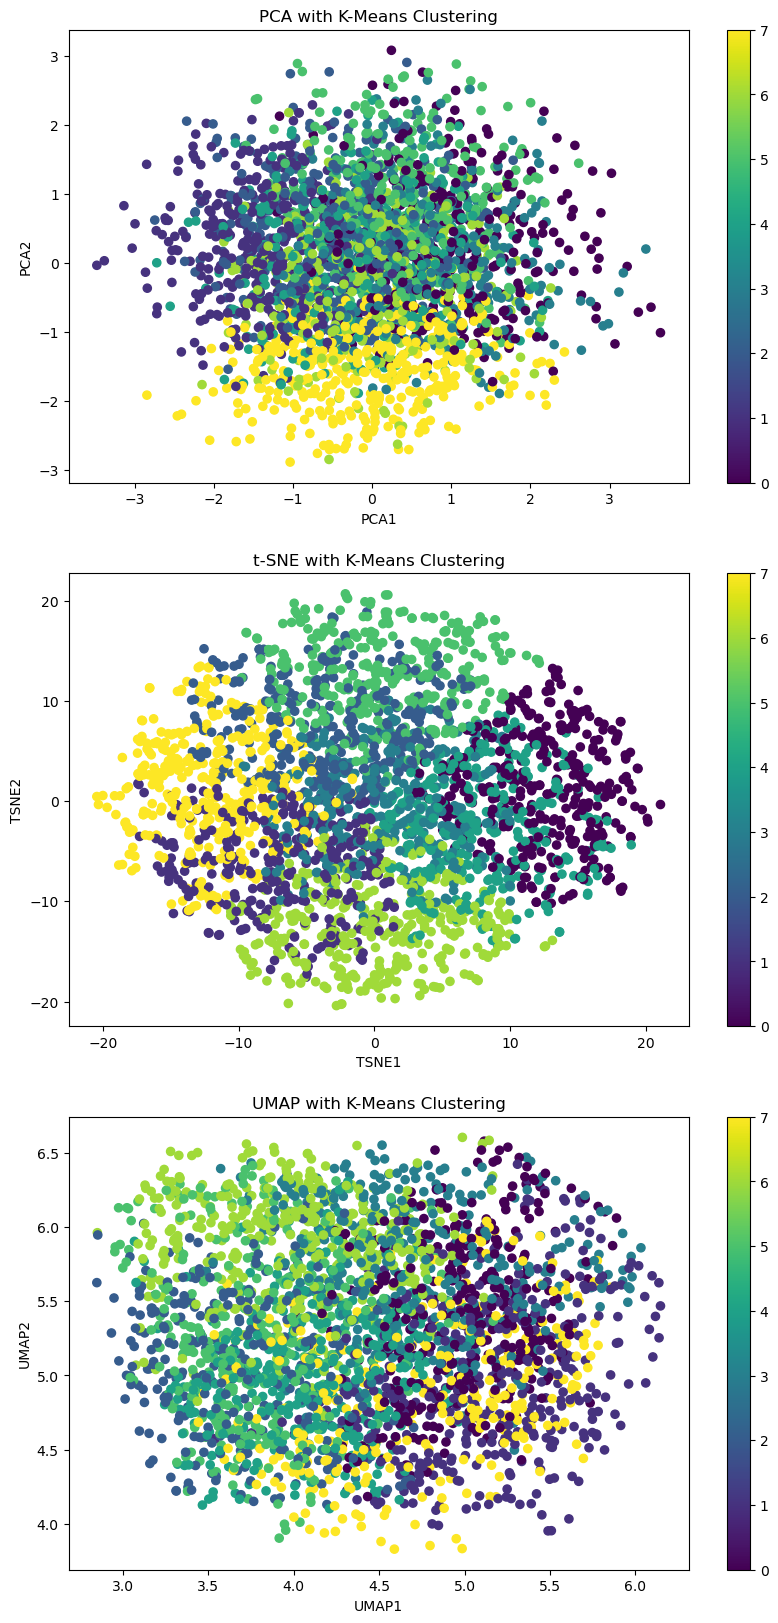

In [214]:
#Kmeans Visuals with PCA
plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=kmeans_pca, cmap='viridis', s=35)
plt.title('PCA with K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()


#Kmeans Visuals with t-SNE
plt.subplot(3,1,2)
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=kmeans_tsne, cmap='viridis', s=35)
plt.title('t-SNE with K-Means Clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar()


#Kmeans Visuals with UMAP
plt.subplot(3,1,3)
plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'], c=kmeans_umap, cmap='viridis', s=35)
plt.title('UMAP with K-Means Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar()



## GMM

In [162]:
for i in range(2,15):
  #Gaussian Mixture Model analysis
  gmm = GaussianMixture(n_components=i, random_state=42)

  # GMM with no Reduction
  gmm_norm = gmm.fit_predict(health_stnd)

  gmm_silhouette_score = silhouette_score(health_stnd, gmm_norm, metric='euclidean')
  print('The silhouette score for Gaussian Mixture without reduction is {} with the # of components being {}'.format(gmm_silhouette_score, i))

health_stnd_cluster['GMM_Labels'] = gmm_norm 

#silhouette score for Gaussian Mixture without reduction is 0.06457292283637638 with the # of components being 4

The silhouette score for Gaussian Mixture without reduction is 0.06292408524790011 with the # of components being 2
The silhouette score for Gaussian Mixture without reduction is 0.0500566123244642 with the # of components being 3
The silhouette score for Gaussian Mixture without reduction is 0.06457292283637638 with the # of components being 4
The silhouette score for Gaussian Mixture without reduction is 0.05233534621224886 with the # of components being 5
The silhouette score for Gaussian Mixture without reduction is 0.033146497602774945 with the # of components being 6
The silhouette score for Gaussian Mixture without reduction is 0.03508407096365426 with the # of components being 7
The silhouette score for Gaussian Mixture without reduction is 0.0428004738690218 with the # of components being 8
The silhouette score for Gaussian Mixture without reduction is 0.01839732702718688 with the # of components being 9
The silhouette score for Gaussian Mixture without reduction is 0.01994996

In [168]:
#PCA with GMM
for i in range(2, 10):
    # PCA with dynamic number of components
    pca = PCA(n_components=i)

    # Fitting data to PCA reduction
    pca_health = pca.fit_transform(health_stnd)

    # Generate column names based on the number of components
    columns_pca = [f'PCA{j+1}' for j in range(i)]

    # Create DataFrame with dynamic column names
    df_pca = pd.DataFrame(pca_health, columns=columns_pca)

    #Gaussian Mixture Model analysis
    gmm = GaussianMixture(n_components=4, random_state=42)

    # GMM with no Reduction
    gmm_pca = gmm.fit_predict(pca_health)

    pca_gmm_silhouette_score = silhouette_score(df_pca, gmm_pca, metric='euclidean')
    print('The silhouette score for Gaussian Mixture with PCA reduction is {} with the # of components being {}'.format(pca_gmm_silhouette_score, i))

health_stnd_cluster['PCA_GMM_Labels'] = gmm_pca 

The silhouette score for Gaussian Mixture with PCA reduction is 0.3147408774443708 with the # of components being 2
The silhouette score for Gaussian Mixture with PCA reduction is 0.22529680200897959 with the # of components being 3
The silhouette score for Gaussian Mixture with PCA reduction is 0.16605856562665305 with the # of components being 4
The silhouette score for Gaussian Mixture with PCA reduction is 0.12629414923878005 with the # of components being 5
The silhouette score for Gaussian Mixture with PCA reduction is 0.10189445016310904 with the # of components being 6
The silhouette score for Gaussian Mixture with PCA reduction is 0.08590112576338362 with the # of components being 7
The silhouette score for Gaussian Mixture with PCA reduction is 0.06553544599435568 with the # of components being 8
The silhouette score for Gaussian Mixture with PCA reduction is 0.04391067148433342 with the # of components being 9


In [174]:
#t-SNE with GMM 
for i in range(2, 4):
    # t-SNE with dynamic number of components
    tsne = TSNE(n_components=i, n_iter=300, random_state=42)

    # Fitting data to t-SNE reduction
    tsne_health = tsne.fit_transform(health_stnd)

    # Generate column names based on the number of components
    columns_tsne = [f'TSNE{j+1}' for j in range(i)]

    # Create DataFrame with dynamic column names
    df_tsne = pd.DataFrame(tsne_health, columns=columns_tsne)

    #Gaussian Mixture Model analysis
    gmm = GaussianMixture(n_components=4, random_state=42)

    # GMM with no Reduction
    gmm_tsne = gmm.fit_predict(tsne_health)

    tsne_gmm_silhouette_score = silhouette_score(df_tsne, gmm_tsne, metric='euclidean')
    print('The silhouette score for Gaussian Mixture with t-SNE reduction is {} with the # of components being {}'.format(tsne_gmm_silhouette_score, i))

health_stnd_cluster['tSNE_GMM_Labels'] = gmm_tsne 

#silhouette score for Gaussian Mixture with t-SNE reduction is 0.34286409616470337 with the # of components being 2

The silhouette score for Gaussian Mixture with t-SNE reduction is 0.34286409616470337 with the # of components being 2
The silhouette score for Gaussian Mixture with t-SNE reduction is 0.25736209750175476 with the # of components being 3


In [176]:
#UMAP with GMM
for i in range(2,10):
    # UMAP with dynamic number of components
    time_start = time.time()
    umap_health = umap.UMAP(n_neighbors=7, n_components=i, min_dist=.3, metric='correlation').fit_transform(health_stnd)
    
    # Generate column names based on the number of components
    columns_umap = [f'UMAP{j+1}' for j in range(i)]

    # Create DataFrame with dynamic column names
    df_umap = pd.DataFrame(umap_health, columns=columns_umap)

    #Gaussian Mixture Model analysis
    gmm = GaussianMixture(n_components=4, random_state=42)

    # GMM with no Reduction
    gmm_umap = gmm.fit_predict(umap_health)

    umap_gmm_silhouette_score = silhouette_score(df_umap, gmm_umap, metric='euclidean')
    print('The silhouette score for Gaussian Mixture with UMAP reduction is {} with the # of components being {}'.format(umap_gmm_silhouette_score, i))

health_stnd_cluster['UMAP_GMM_Labels'] = gmm_umap 
#silhouette score for Gaussian Mixture with UMAP reduction is 0.35503825545310974 with the # of components being 2

The silhouette score for Gaussian Mixture with UMAP reduction is 0.35503825545310974 with the # of components being 2
The silhouette score for Gaussian Mixture with UMAP reduction is 0.2595871388912201 with the # of components being 3
The silhouette score for Gaussian Mixture with UMAP reduction is 0.18977327644824982 with the # of components being 4
The silhouette score for Gaussian Mixture with UMAP reduction is 0.15142282843589783 with the # of components being 5
The silhouette score for Gaussian Mixture with UMAP reduction is 0.12732446193695068 with the # of components being 6
The silhouette score for Gaussian Mixture with UMAP reduction is 0.12030413001775742 with the # of components being 7
The silhouette score for Gaussian Mixture with UMAP reduction is 0.09459134936332703 with the # of components being 8
The silhouette score for Gaussian Mixture with UMAP reduction is 0.07889411598443985 with the # of components being 9


From the scatter plot all of the reduction techniques are pretty noisy with UMAP having the least amount of overlap. It looks like PCA performs slightly better than t-SNE and UMAP in reducing the dimensions of the data because it keeps the clusters together.

<Figure size 1000x2000 with 0 Axes>

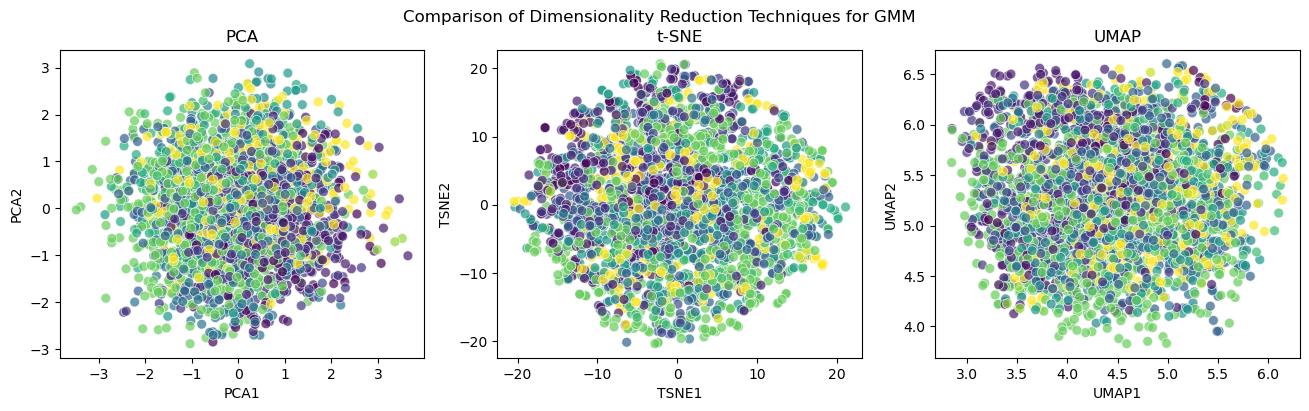

In [198]:
#Visualization of Dimensional Reduction techniques for Gaussian Mixture Models

plt.figure(figsize=(10,20))

# PCA scatterplot
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue=health_stnd_cluster['GMM_Labels'], palette='viridis', data=df_pca, legend=False, s=50, alpha=.7)
plt.title('PCA')

# t-SNE scatterplot
plt.subplot(1, 3, 2)
sns.scatterplot(x='TSNE1', y='TSNE2',hue=health_stnd_cluster['GMM_Labels'], palette='viridis', data=df_tsne, legend=False, s=50, alpha=.7)
plt.title('t-SNE')

# UMAP scatterplot
plt.subplot(1, 3, 3)
sns.scatterplot(x='UMAP1', y='UMAP2', hue=health_stnd_cluster['GMM_Labels'], palette='viridis', data=df_umap, legend=False, s=50, alpha=.7)
plt.title('UMAP')

plt.suptitle('Comparison of Dimensionality Reduction Techniques for GMM', fontsize=12)
plt.show()

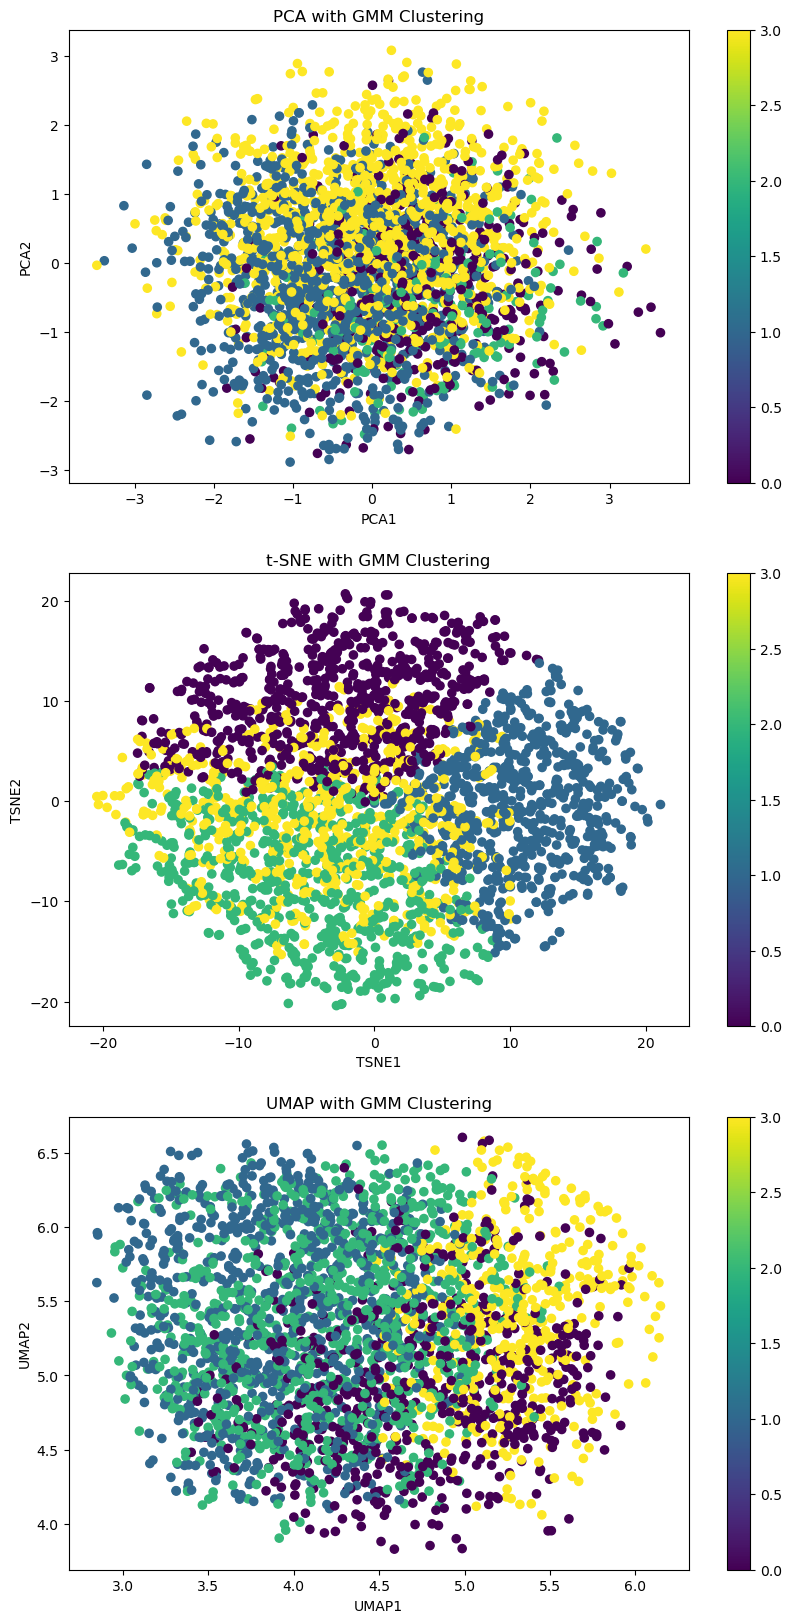

In [210]:
#GMM Visuals with PCA
plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=gmm_pca, cmap='viridis', s=35)
plt.title('PCA with GMM Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()


#GMM Visuals with t-SNE
plt.subplot(3,1,2)
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=gmm_tsne, cmap='viridis', s=35)
plt.title('t-SNE with GMM Clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar()


#GMM Visuals with UMAP
plt.subplot(3,1,3)
plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'], c=gmm_umap, cmap='viridis', s=35)
plt.title('UMAP with GMM Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar()



The best-performing model along with the dimension reduction technique looks to be the GMM model with t-SNE dimension reduction. The GMM model was able to find groupings, and had the best silhouette score of the clustering models with a score of 0.34286. The K-Means model with t-SNE reduction  was the next best mode as far as silhouette score, but I didn't choose this one because the groups had heavy overlapping between them.